In [1]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

/bin/bash: kaggle: command not found


In [2]:
import re, json
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
PATH = '/home/ai-sjjy/workspace/juyoung/HousePrices/dataset/'

In [4]:
TRAIN_DATA = 'train.csv'
TEST_DATA = 'test.csv'

In [5]:
train_df = pd.read_csv(PATH + TRAIN_DATA)
test_df = pd.read_csv(PATH + TEST_DATA)

In [6]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
# OverallQual, YearBUil, TotalBsmtSF, GrLiveArea

In [8]:
from sklearn.preprocessing import LabelEncoder
features = ['ExterQual','BsmtQual']
for feature in features:   
    le = LabelEncoder()
    train_df[feature] = le.fit_transform(train_df[feature])
    test_df[feature] = le.fit_transform(test_df[feature])

In [9]:
test_df['BsmtQual']

0       3
1       3
2       2
3       3
4       2
       ..
1454    3
1455    3
1456    3
1457    2
1458    2
Name: BsmtQual, Length: 1459, dtype: int64

In [10]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# SalePrice 데이터 분석

In [11]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/home/ai-sjjy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


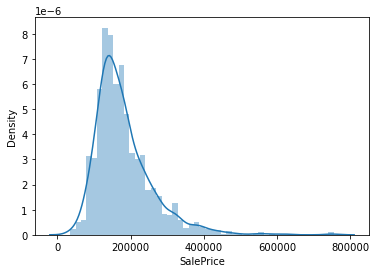

In [12]:
sns.distplot(train_df['SalePrice']);

/home/ai-sjjy/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

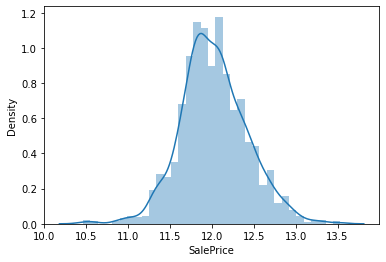

In [13]:
sns.distplot(np.log(train_df['SalePrice']), kde=True)  # log-normal dist

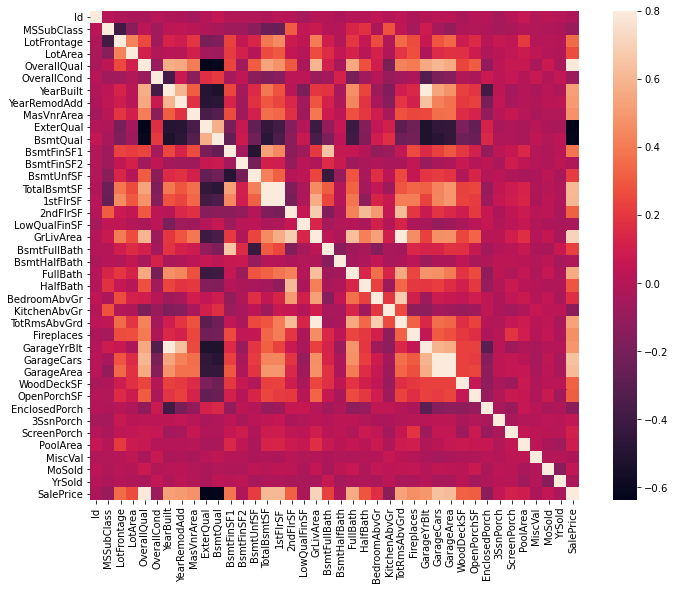

In [14]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [15]:
corrmat.sort_values(by='SalePrice', ascending=False).T.tail(3) # SalePrice 맨밑줄만 보기 위해

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,MiscVal,Id,LowQualFinSF,YrSold,OverallCond,MSSubClass,EnclosedPorch,KitchenAbvGr,BsmtQual,ExterQual
MoSold,0.046432,0.070815,0.050240,0.040522,0.027974,0.013196,0.031372,0.055872,0.036907,0.012398,...,-0.006495,0.021172,-0.022174,-0.145721,-0.003511,-0.013585,-0.028887,0.026589,-0.008056,-0.024720
YrSold,-0.028923,-0.027347,-0.036526,-0.039117,-0.027378,-0.014969,-0.013604,-0.019669,-0.034516,-0.013618,...,0.004906,0.000712,-0.028921,1.000000,0.043950,-0.021407,-0.009916,0.031687,0.029369,-0.036300
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,...,-0.021190,-0.021917,-0.025606,-0.028923,-0.077856,-0.084284,-0.128578,-0.135907,-0.620886,-0.636884


In [16]:
k=7
cols = corrmat.nlargest(k, 'SalePrice') # SalePrice열기준 가장 큰 놈 순서대로 7개 나열
cols  

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,-0.636884,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,-0.634319,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,-0.407642,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,-0.449980,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,-0.443532,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,-0.445952,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,-0.383767,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852


In [17]:
# GarageCars, OverallQual은 categorical data이고 ( 즉 discreate한 값들로 구성)
# GrLivArea, GarageArea, TotalBsmtSF는 numerical data 일 것이다.

In [18]:
train_df.GarageCars

0       2
1       2
2       2
3       3
4       3
       ..
1455    2
1456    2
1457    1
1458    1
1459    1
Name: GarageCars, Length: 1460, dtype: int64

In [19]:
train_df.OverallQual

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

In [20]:
train_df.GrLivArea

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [21]:
train_df.GarageArea

0       548
1       460
2       608
3       642
4       836
       ... 
1455    460
1456    500
1457    252
1458    240
1459    276
Name: GarageArea, Length: 1460, dtype: int64

In [22]:
train_df.TotalBsmtSF

0        856
1       1262
2        920
3        756
4       1145
        ... 
1455     953
1456    1542
1457    1152
1458    1078
1459    1256
Name: TotalBsmtSF, Length: 1460, dtype: int64

In [23]:
# 수치형 데이터 먼저 분석

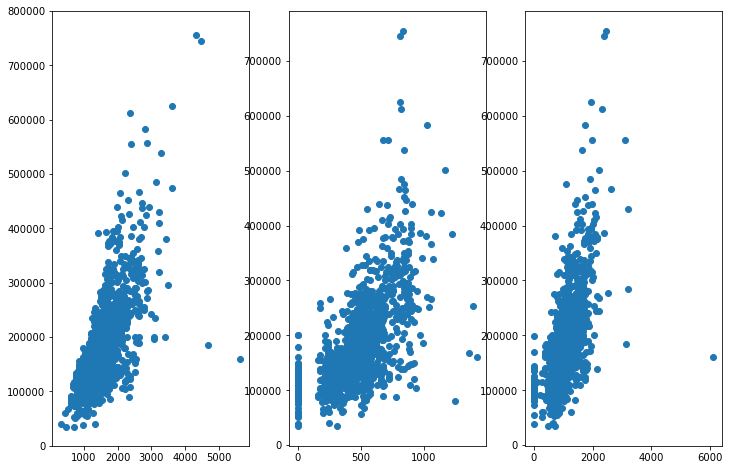

In [24]:
var1 = 'GrLivArea'      
var2 = 'GarageArea'
var3 = 'TotalBsmtSF'     # 3개 모두 수치형 데이터(numerical data)

plt.figure(figsize=(12,8))
plt.subplot(1, 3, 1)
plt.ylim(0, 800000)
plt.scatter(train_df[var1], train_df.SalePrice)
plt.subplot(1, 3, 2)
plt.scatter(train_df[var2], train_df.SalePrice)
plt.subplot(1, 3, 3)
plt.scatter(train_df[var3], train_df.SalePrice)

In [25]:
# GrLivArea에 대해서 linear 함
# 


In [26]:
# 범주형 데이터 파악

In [27]:
# OverallQual

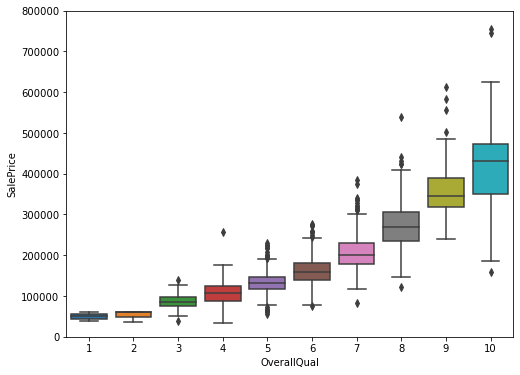

In [28]:
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=train_df)
fig.axis(ymin=0, ymax=800000);

In [29]:
# OverallQual의 각 카테고리(class)들에 대해 SalePrice의 값이 순차적으로 확연히 달라지는것을 확인할 수 있으므로
# 굉장히 유용한 데이터임

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

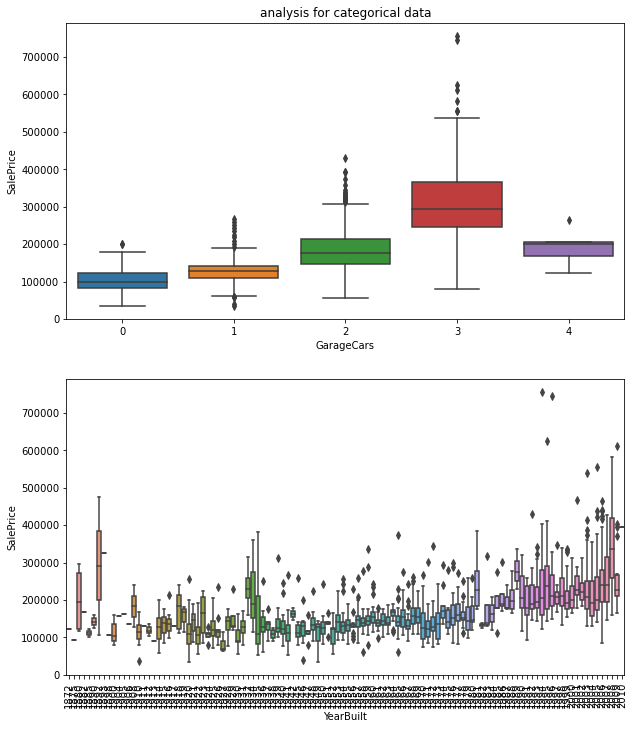

In [30]:
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.title('analysis for categorical data')
sns.boxplot(data=train_df, x='GarageCars', y='SalePrice')
plt.subplot(2,1,2)
sns.boxplot(data=train_df, x='YearBuilt', y='SalePrice')
plt.xticks(rotation=90)

In [31]:
# GarageCars도 어느정도 긍정적으로 SalePrice에 대해 값이 다르게 분포함 
# category 2와 4가 겹치긴 하지만

In [32]:
# year_built를 보면 

/home/ai-sjjy/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


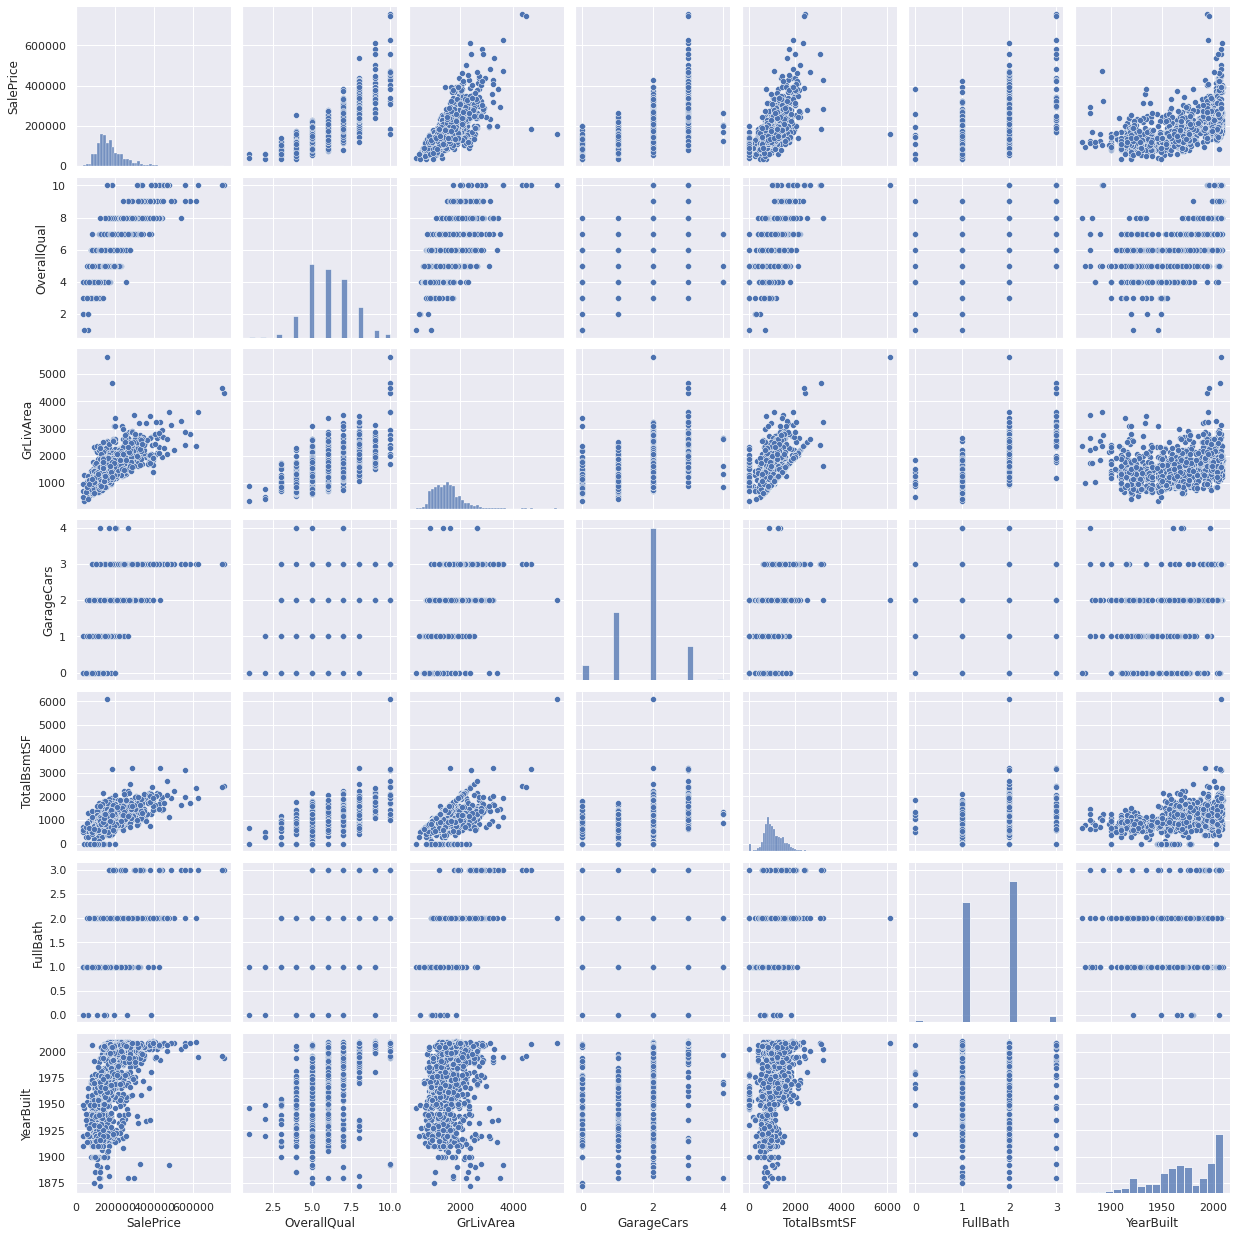

In [33]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.show();

# 결측치 이상치 처리

In [34]:
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [35]:
train_df.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [36]:
total = test_df.isna().sum().sort_values(ascending=False)
percent = (test_df.isna().sum()/test_df.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)   # PoolQC부터 LotFrontage는 missing Value가 너무 많아서 없앨 것임

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [37]:
total = train_df.isna().sum().sort_values(ascending=False)
percent = (train_df.isna().sum()/train_df.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)   # PoolQC부터 LotFrontage는 missing Value가 너무 많아서 없앨 것임

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [38]:
train_df = train_df.drop(['PoolQC'], axis=1)
train_df = train_df.drop(['MiscFeature'], axis=1)
train_df = train_df.drop(['Alley'], axis=1)
train_df = train_df.drop(['Fence'], axis=1)
train_df = train_df.drop(['FireplaceQu'], axis=1)

test_df = test_df.drop(['PoolQC'], axis=1)
test_df = test_df.drop(['MiscFeature'], axis=1)
test_df = test_df.drop(['Alley'], axis=1)
test_df = test_df.drop(['Fence'], axis=1)
test_df = test_df.drop(['FireplaceQu'], axis=1)

In [39]:
train_df.isna().sum().sort_values(ascending=False)

LotFrontage     259
GarageType       81
GarageCond       81
GarageYrBlt      81
GarageFinish     81
               ... 
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
MSSubClass        0
SalePrice         0
Length: 76, dtype: int64

In [40]:
print(train_df.shape)
print(test_df.shape)

(1460, 76)
(1459, 75)


# LotFrontage 수치형 데이터 Nan 평균으로 채우기

In [41]:
train_df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [42]:
int(train_df['LotFrontage'].mean())

70

In [43]:
# 평균 대입
train_df.loc[train_df['LotFrontage'].isnull(), 'LotFrontage']=int(train_df['LotFrontage'].mean())
test_df.loc[test_df['LotFrontage'].isnull(), 'LotFrontage']=int(test_df['LotFrontage'].mean())

In [44]:
train_df['LotFrontage'].unique()
# nan 사라짐

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  70.,  51.,  50.,  91.,
        72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,  74.,
       115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,  81.,
        95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,  67.,
        83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144., 114.,
       128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,  46.])

In [45]:
# 여기 밑부분은 안하는 부분

### Garage, Bsmt, Mas 부분의 결측치행이 모두 같아서 공통된것 하나만 행으로 삭제시키면 다 삭제가 됨
* 시험적으로 train_df2라는 새로운 데이터 프레임을 만듬
* (해당 결측치 행으로 제거한 경우)

In [46]:
train_df.isna().sum().sort_values(ascending=False)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
                ..
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
MSSubClass       0
SalePrice        0
Length: 76, dtype: int64

In [47]:
train_df2 = train_df.dropna(subset=['GarageYrBlt'])
train_df2.isna().sum().sort_values(ascending=False)

BsmtExposure    31
BsmtFinType2    31
BsmtCond        30
BsmtFinType1    30
MasVnrType       8
                ..
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
MSSubClass       0
SalePrice        0
Length: 76, dtype: int64

In [48]:
train_df2.shape

(1379, 76)

In [49]:
train_df2 = train_df2.dropna(subset=['BsmtFinType2'])
train_df2.isna().sum().sort_values(ascending=False)

MasVnrType      8
MasVnrArea      8
Electrical      1
BsmtExposure    1
HalfBath        0
               ..
ExterQual       0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 76, dtype: int64

In [50]:
train_df2.shape

(1348, 76)

In [51]:
train_df2 = train_df2.dropna(subset=['MasVnrType'])
train_df2.isna().sum().sort_values(ascending=False)

Electrical      1
BsmtExposure    1
Id              0
HalfBath        0
Fireplaces      0
               ..
MasVnrType      0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 76, dtype: int64

In [52]:
train_df2.shape

(1340, 76)

In [53]:
train_df2 = train_df2.dropna(subset=['Electrical'])
train_df2 = train_df2.dropna(subset=['BsmtExposure'])
train_df2.isna().sum().sort_values(ascending=False)

Id              0
FullBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrType      0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 76, dtype: int64

# 원래 하려는 것
* 수치적 데이터는 평균으로 nan을 채움
* 범주형 데이터는 0으로 nan을 채움    음.............

In [54]:
total = train_df.isna().sum().sort_values(ascending=False)
percent = (train_df.isna().sum()/train_df.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)   # PoolQC부터 LotFrontage는 missing Value가 너무 많아서 없앨 것임

,Total,Percent
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342
MasVnrArea,8,0.005479


In [55]:
total = test_df.isna().sum().sort_values(ascending=False)
percent = (test_df.isna().sum()/test_df.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)   # PoolQC부터 LotFrontage는 missing Value가 너무 많아서 없앨 것임

,Total,Percent
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461
GarageQual,78,0.053461
GarageCond,78,0.053461
GarageType,76,0.052090
BsmtCond,45,0.030843
BsmtExposure,44,0.030158
BsmtFinType2,42,0.028787
BsmtFinType1,42,0.028787
MasVnrType,16,0.010966


# Garabage 부분 데이터 처리

In [56]:
# GarageType nan을 none으로 수정

In [57]:
train_df.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [58]:
train_df.loc[train_df['GarageType'].isnull(), 'GarageType']='None'
test_df.loc[test_df['GarageType'].isnull(), 'GarageType']='None'

In [59]:
train_df.GarageType.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'None', 'Basment',
       '2Types'], dtype=object)

In [60]:
# GarageYrBlt nan을 평균 값으로 수정

In [61]:
train_df.GarageYrBlt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [62]:
int(train_df['GarageYrBlt'].mean())

1978

In [63]:
train_df.loc[train_df['GarageYrBlt'].isnull(), 'GarageYrBlt']=int(train_df['GarageYrBlt'].mean())
test_df.loc[test_df['GarageYrBlt'].isnull(), 'GarageYrBlt']=int(test_df['GarageYrBlt'].mean())

In [64]:
train_df.GarageYrBlt.unique()
# nan 사라짐

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953., 1978., 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1982., 1992., 1925., 1941.,
       2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928., 1922.,
       1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [65]:
# GarageFinish 

In [66]:
train_df.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [67]:
train_df.loc[train_df['GarageFinish'].isnull(), 'GarageFinish']='None'
test_df.loc[test_df['GarageFinish'].isnull(), 'GarageFinish']='None'

In [68]:
train_df.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', 'None'], dtype=object)

In [69]:
# GarageQual

In [70]:
train_df.GarageQual.unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [71]:
train_df.loc[train_df['GarageQual'].isnull(), 'GarageQual']='None'
test_df.loc[test_df['GarageQual'].isnull(), 'GarageQual']='None'

In [72]:
train_df.GarageQual.unique()

array(['TA', 'Fa', 'Gd', 'None', 'Ex', 'Po'], dtype=object)

In [73]:
# GarageCond

In [74]:
train_df.GarageCond.unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [75]:
train_df.loc[train_df['GarageCond'].isnull(), 'GarageCond']='None'
test_df.loc[test_df['GarageCond'].isnull(), 'GarageCond']='None'

In [76]:
train_df.GarageCond.unique()

array(['TA', 'Fa', 'None', 'Gd', 'Po', 'Ex'], dtype=object)

In [77]:
total = test_df.isna().sum().sort_values(ascending=False)
percent = (test_df.isna().sum()/test_df.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)   # PoolQC부터 LotFrontage는 missing Value가 너무 많아서 없앨 것임

,Total,Percent
BsmtCond,45,0.030843
BsmtExposure,44,0.030158
BsmtFinType2,42,0.028787
BsmtFinType1,42,0.028787
MasVnrType,16,0.010966
MasVnrArea,15,0.010281
MSZoning,4,0.002742
BsmtFullBath,2,0.001371
BsmtHalfBath,2,0.001371
Utilities,2,0.001371


# Bsmt 부분 결측치 처리

In [78]:
# BsmtFinType2 결측치 처리

In [79]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [80]:
train_df.loc[train_df['BsmtFinType2'].isnull(), 'BsmtFinType2']='None'
test_df.loc[test_df['BsmtFinType2'].isnull(), 'BsmtFinType2']='None'
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', 'None', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [81]:
# BsmtExposure 결측치 처리

In [82]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [83]:
train_df.loc[train_df['BsmtExposure'].isnull(), 'BsmtExposure']='None'
test_df.loc[test_df['BsmtExposure'].isnull(), 'BsmtExposure']='None'
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', 'None'], dtype=object)

In [84]:
# BsmtQual 결측치 처리

In [85]:
train_df['BsmtQual'].unique()

array([2, 3, 0, 4, 1])

In [86]:
# 앞서 가치있는 feature라고 판단하여 이미 labelEncoding을 해서 적용 결측치 고려할 필요없음

In [87]:
#BsmtCond 결측치 처리

In [88]:
train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [89]:
train_df.loc[train_df['BsmtCond'].isnull(), 'BsmtCond']='None'
test_df.loc[test_df['BsmtCond'].isnull(), 'BsmtCond']='None'
train_df['BsmtCond'].unique()

array(['TA', 'Gd', 'None', 'Fa', 'Po'], dtype=object)

In [90]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [91]:
train_df.loc[train_df['BsmtFinType1'].isnull(),'BsmtFinType1']='None'
test_df.loc[test_df['BsmtFinType1'].isnull(),'BsmtFinType1']='None'
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'None', 'LwQ'], dtype=object)

In [92]:
total = test_df.isna().sum().sort_values(ascending=False)
percent = (test_df.isna().sum()/test_df.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)   # PoolQC부터 LotFrontage는 missing Value가 너무 많아서 없앨 것임

,Total,Percent
MasVnrType,16,0.010966
MasVnrArea,15,0.010281
MSZoning,4,0.002742
Functional,2,0.001371
BsmtFullBath,2,0.001371
BsmtHalfBath,2,0.001371
Utilities,2,0.001371
Exterior2nd,1,0.000685
Exterior1st,1,0.000685
GarageCars,1,0.000685


# Mas 부분 결측치 처리

In [93]:
train_df['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [94]:
train_df.loc[train_df['MasVnrArea'].isnull(),'MasVnrArea']=train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean(), inplace=True)
train_df['MasVnrArea'].unique()

array([1.96000000e+02, 0.00000000e+00, 1.62000000e+02, 3.50000000e+02,
       1.86000000e+02, 2.40000000e+02, 2.86000000e+02, 3.06000000e+02,
       2.12000000e+02, 1.80000000e+02, 3.80000000e+02, 2.81000000e+02,
       6.40000000e+02, 2.00000000e+02, 2.46000000e+02, 1.32000000e+02,
       6.50000000e+02, 1.01000000e+02, 4.12000000e+02, 2.72000000e+02,
       4.56000000e+02, 1.03100000e+03, 1.78000000e+02, 5.73000000e+02,
       3.44000000e+02, 2.87000000e+02, 1.67000000e+02, 1.11500000e+03,
       4.00000000e+01, 1.04000000e+02, 5.76000000e+02, 4.43000000e+02,
       4.68000000e+02, 6.60000000e+01, 2.20000000e+01, 2.84000000e+02,
       7.60000000e+01, 2.03000000e+02, 6.80000000e+01, 1.83000000e+02,
       4.80000000e+01, 2.80000000e+01, 3.36000000e+02, 6.00000000e+02,
       7.68000000e+02, 4.80000000e+02, 2.20000000e+02, 1.84000000e+02,
       1.12900000e+03, 1.16000000e+02, 1.35000000e+02, 2.66000000e+02,
       8.50000000e+01, 3.09000000e+02, 1.36000000e+02, 2.88000000e+02,
      

In [95]:
train_df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [96]:
train_df.loc[train_df['MasVnrType'].isnull(),'MasVnrType']='None'
train_df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

# 나머지 Electrical 결측치 처리

In [97]:
train_df.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [98]:
train_df.loc[train_df['Electrical'].isnull(), 'Electrical']='None'

In [99]:
train_df.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', 'None'], dtype=object)

In [100]:
total = train_df.isna().sum().sort_values(ascending=False)
percent = (train_df.isna().sum()/train_df.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)   # PoolQC부터 LotFrontage는 missing Value가 너무 많아서 없앨 것임

,Total,Percent
Id,0,0.0
FullBath,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
BedroomAbvGr,0,0.0
HalfBath,0,0.0
BsmtHalfBath,0,0.0


In [101]:
total = test_df.isna().sum().sort_values(ascending=False)
percent = (test_df.isna().sum()/test_df.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)   # PoolQC부터 LotFrontage는 missing Value가 너무 많아서 없앨 것임

,Total,Percent
MasVnrType,16,0.010966
MasVnrArea,15,0.010281
MSZoning,4,0.002742
Functional,2,0.001371
BsmtFullBath,2,0.001371
BsmtHalfBath,2,0.001371
Utilities,2,0.001371
Exterior2nd,1,0.000685
Exterior1st,1,0.000685
GarageCars,1,0.000685


In [102]:
train_df.TotalBsmtSF.unique()

array([ 856, 1262,  920,  756, 1145,  796, 1686, 1107,  952,  991, 1040,
       1175,  912, 1494, 1253,  832, 1004,    0, 1114, 1029, 1158,  637,
       1777, 1060, 1566,  900, 1704, 1484,  520,  649, 1228, 1234, 1398,
       1561, 1117, 1097, 1297, 1057, 1088, 1350,  840,  938, 1150, 1752,
       1434, 1656,  736,  955,  794,  816, 1842,  384, 1425,  970,  860,
       1410,  780,  530, 1370,  576, 1143, 1947, 1453,  747, 1304, 2223,
        845, 1086,  462,  672, 1768,  440,  896, 1237, 1563, 1065, 1288,
        684,  612, 1013,  990, 1235,  876, 1214,  824,  680, 1588,  960,
        458,  950, 1610,  741, 1226, 1053,  641,  789,  793, 1844,  994,
       1264, 1809, 1028,  729, 1092, 1125, 1673,  728,  732, 1080, 1199,
       1362, 1078,  660, 1008,  924,  992, 1063, 1267, 1461, 1907,  928,
        864, 1734,  910, 1490, 1728,  715,  884,  969, 1710,  825, 1602,
       1200,  572,  774, 1392, 1232, 1572, 1541,  882, 1149,  644, 1617,
       1582,  720, 1064, 1606, 1202, 1151, 1052, 22

In [103]:
test_df.loc[train_df['TotalBsmtSF'].isnull(), 'TotalBsmtSF']=int(train_df['TotalBsmtSF'].mean())
test_df.TotalBsmtSF.isnull().sum()

1

In [104]:
# 여기까지가 일단 train은 결측치 처리 모두 해주었고, test는 주요 data만 결측치 처리함
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [105]:
########

In [106]:
train_df.Id

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

In [107]:
train_df['GrLivArea'][train_df['GrLivArea']>=5000]

1298    5642
Name: GrLivArea, dtype: int64

## 확인

In [108]:
categorical_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'ExterQual', 'BsmtQual']

In [109]:
train_df = train_df[categorical_features + ['SalePrice']]
test_df = test_df[categorical_features+['Id']]

In [110]:
train_df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,ExterQual,BsmtQual,SalePrice
0,7,1710,2,548,856,2,2,208500
1,6,1262,2,460,1262,3,2,181500
2,7,1786,2,608,920,2,2,223500
3,7,1717,3,642,756,3,3,140000
4,8,2198,3,836,1145,2,2,250000


In [111]:
train_df.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
GarageArea     0
TotalBsmtSF    0
ExterQual      0
BsmtQual       0
SalePrice      0
dtype: int64

## 데이터 세트(train, validation)a split

#### 입력 데이터 확인
[method1_test_df, method2_test_df]

* X : method1_train_df
* y : method1_y
    


In [113]:
method1_train_df = train_df

In [114]:
method1_y = method1_train_df['SalePrice']
method1_train_df = method1_train_df.drop('SalePrice', axis=1)

In [115]:
from sklearn.model_selection import train_test_split # 데이터 셋 

# 방법 1
X_train1, X_val1, y_train1, y_val1 = train_test_split(method1_train_df, method1_y, \
                                                      test_size=0.2, random_state=0)

In [116]:
print(len(X_train1))
print(len(y_train1))
print(len(X_val1))
print(len(y_val1))

1168
1168
292
292


## 모델 선언 및 훈련

In [117]:
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

from xgboost.sklearn import XGBRegressor
import xgboost

In [118]:
def evaluation(model, train_x, train_y, val_x, val_y):
    cv = cross_val_score(model, train_x, train_y, cv = 10)
    y_pred = model.predict(val_x)
    cv = np.mean(cv)
    r2=r2_score(y_pred, val_y)
    mae = mean_absolute_error(y_pred, val_y)
    mse = mean_squared_error(y_pred, val_y)

    return cv, r2, mae, mse

In [119]:
def show_plot(model, val_x, val_y):
    y_pred = model.predict(val_x)

    plt.scatter(val_y, y_pred)
    plt.xlabel("Price Index: $Y_i$")
    plt.ylabel("Predicted price Index: $\hat{Y}_i$")
    plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

### [1] Linear Regression

In [120]:
lgs=LinearRegression()
lgs.fit(X_train1, y_train1)

LinearRegression()

In [121]:
print("Accuracy : %f" % lgs.score(X_val1, y_val1)) # score()함수 => 정확도 측정

Accuracy : 0.660303


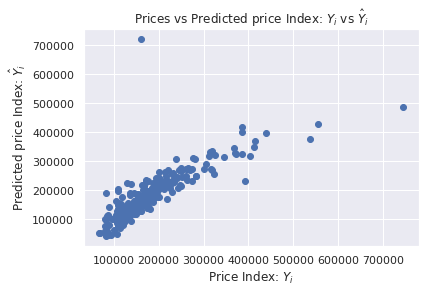

In [122]:
show_plot(lgs, X_val1, y_val1)

### [2] GradientBoostingRegressor

In [124]:
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=10, random_state=31)
gbr.fit(X_train1, y_train1)

GradientBoostingRegressor(max_depth=10, n_estimators=1000, random_state=31)

In [125]:
result = evaluation(gbr, X_train1, y_train1, X_val1, y_val1)
print("Cross val score: " + str(result[0]))
print("R^2 score: " + str(result[1]))
print("Mean Absolute Erro: " + str(result[2]))
print("Mean Mean Squared Erro: " + str(result[3]))

Cross val score: 0.7371986341204524
R^2 score: 0.8316456627575262
Mean Absolute Erro: 23409.475885884938
Mean Mean Squared Erro: 1220458430.6246765


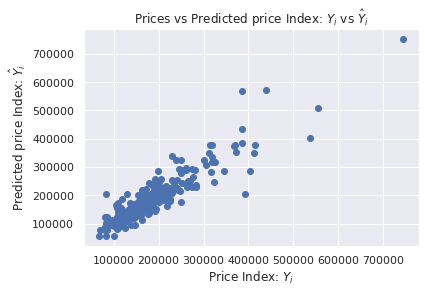

In [126]:
show_plot(gbr, X_val1, y_val1)

### [3] Random Forest Model

In [127]:
forest=RandomForestRegressor(bootstrap=False, max_depth=500, max_features='auto',
                       min_samples_leaf=15,criterion='mse', n_jobs=-1, random_state=18)

forest.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=False, max_depth=500, min_samples_leaf=15,
                      n_jobs=-1, random_state=18)

In [128]:
result = evaluation(forest, X_train1, y_train1, X_val1, y_val1)
print("Cross val score: " + str(result[0]))
print("R^2 score: " + str(result[1]))
print("Mean Absolute Erro: " + str(result[2]))
print("Mean Mean Squared Erro: " + str(result[3]))

Cross val score: 0.782392385497483
R^2 score: 0.7131176213109837
Mean Absolute Erro: 24039.325434191236
Mean Mean Squared Erro: 1652176020.5791438


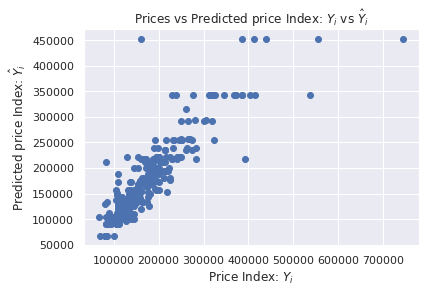

In [129]:
show_plot(forest, X_val1, y_val1)

### [4] XGBoost Regressor

In [130]:
xgb = XGBRegressor(learning_rate=0.01, n_estimators=1000, \
                       objective='reg:squarederror', random_state = 31)

xgb.fit(X_train1, y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=31,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

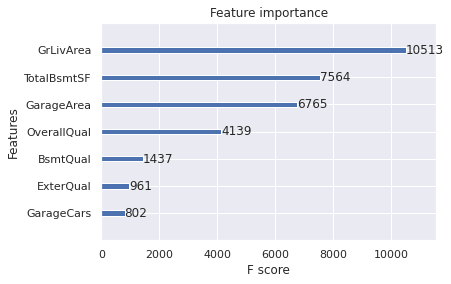

In [131]:
xgboost.plot_importance(xgb)

In [132]:
result = evaluation(xgb, X_train1, y_train1, X_val1, y_val1)
print("Cross val score: " + str(result[0]))
print("R^2 score: " + str(result[1]))
print("Mean Absolute Erro: " + str(result[2]))
print("Mean Mean Squared Erro: " + str(result[3]))

Cross val score: 0.7735538193567716
R^2 score: 0.866737925095084
Mean Absolute Erro: 19441.989833047945
Mean Mean Squared Erro: 905869786.4610928


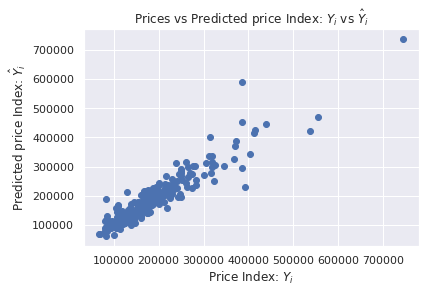

In [133]:
show_plot(xgb, X_val1, y_val1)

## Kaggle submission

TEST DATA이용

* [method1_test_df, method2_test_df]

In [136]:
test_df.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     1
GarageArea     1
TotalBsmtSF    1
ExterQual      0
BsmtQual       0
Id             0
dtype: int64

In [134]:
ids = t['Id']
models = [
    lgs, gbr, forest, xgb
]
models_name = [
    'lgs', 'gbr', 'forest', 'xgb'
]

NameError: name 'method2_test_df' is not defined

In [ ]:
results = []
for idx, model in enumerate(models):
    predictions = model.predict(method2_test_df.drop(['Id'],axis=1))
    df = pd.DataFrame(list(zip(ids, predictions)), columns =['Id', 'SalePrice'])
    df.to_csv('./dataset/result_'+models_name[idx]+'.csv',index=False)